<a href="https://colab.research.google.com/github/NeonLabs146/Neural-network/blob/main/NN_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 1**

In [ ]:
#Perceptron algorithm - linearly separable 2D data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron

In [ ]:
# Step 1: Create a simple linearly separable 2D dataset
X, y = make_classification(n_samples=100, n_features=2,
                           n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, class_sep=2.0, random_state=1)

In [ ]:
# Convert labels from (0,1) to (-1,1)
y = np.where(y == 0, -1, 1)

In [ ]:
# Plot before training
def plot_decision_boundary(weights, bias, title):
    plt.figure(figsize=(8, 6))
    for label, marker, color in zip([-1, 1], ['o', '^'], ['red', 'blue']):
        plt.scatter(X[y == label][:, 0], X[y == label][:, 1],
                    marker=marker, color=color, label=f"Class {label}")
    if weights is not None:
        # Plot decision boundary: w1*x1 + w2*x2 + b = 0
        x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
        y_vals = -(weights[0] * x_vals + bias) / weights[1]
        plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

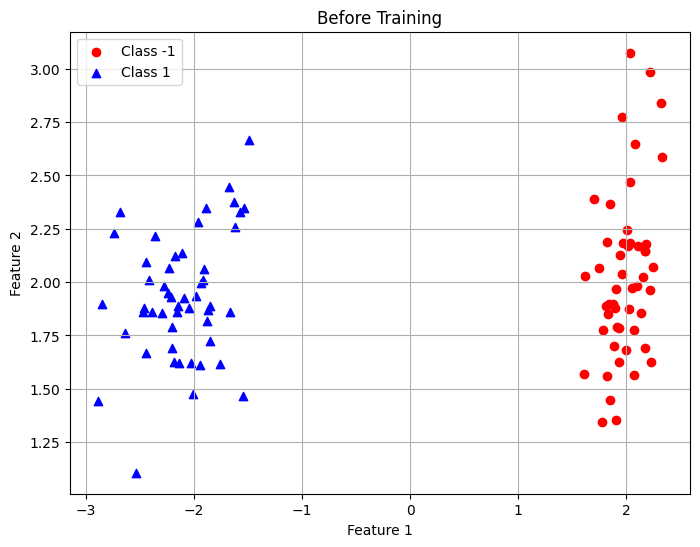

In [ ]:
# Step 2: Plot the data before training (no decision boundary)
plot_decision_boundary(None, None, "Before Training")

In [ ]:
# Step 3: Train a perceptron using sklearn
model = Perceptron(max_iter=1000, tol=1e-3)
model.fit(X, y)

Perceptron()

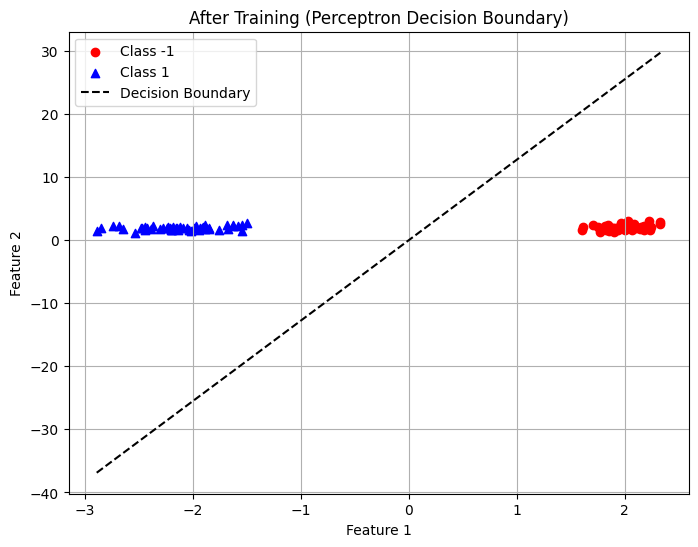

In [ ]:
# Step 4: Plot the decision boundary after training
weights = model.coef_[0]
bias = model.intercept_[0]
plot_decision_boundary(weights, bias, "After Training (Perceptron Decision Boundary)")

# **Single Layer Perceptron for AND and OR Gates**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step activation function
def step_function(x):
    return np.where(x >= 0, 1, 0)

In [ ]:
# Perceptron model class
class Perceptron:
    def __init__(self, input_size, lr=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)  # +1 for bias
        self.lr = lr
        self.epochs = epochs

    def predict(self, x):
        x = np.insert(x, 0, 1)  # insert bias term
        z = np.dot(self.weights, x)
        return step_function(z)

    def train(self, X, y):
        for _ in range(self.epochs):
            for i in range(len(X)):
                x = np.insert(X[i], 0, 1)  # bias input
                y_pred = step_function(np.dot(self.weights, x))
                error = y[i] - y_pred
                self.weights += self.lr * error * x

In [ ]:
# Dataset for AND gate
X_and = np.array([[0,0], [0,1], [1,0], [1,1]])
y_and = np.array([0, 0, 0, 1])

# Dataset for OR gate
X_or = np.array([[0,0], [0,1], [1,0], [1,1]])
y_or = np.array([0, 1, 1, 1])

In [ ]:
# Training AND gate
print("Training Perceptron for AND gate")
and_perceptron = Perceptron(input_size=2)
and_perceptron.train(X_and, y_and)

Training Perceptron for AND gate


In [ ]:
# Testing AND gate
print("AND Gate Results:")
for x in X_and:
    print(f"Input: {x}, Output: {and_perceptron.predict(x)}")

AND Gate Results:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


In [ ]:
# Training OR gate
print("\nTraining Perceptron for OR gate")
or_perceptron = Perceptron(input_size=2)
or_perceptron.train(X_or, y_or)


Training Perceptron for OR gate


In [ ]:
# Testing OR gate
print("OR Gate Results:")
for x in X_or:
    print(f"Input: {x}, Output: {or_perceptron.predict(x)}")

OR Gate Results:
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


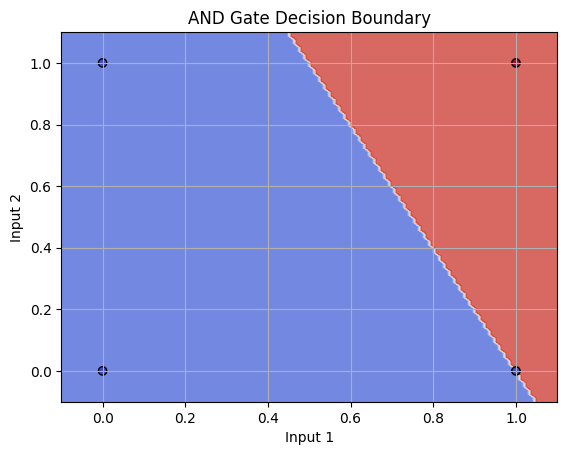

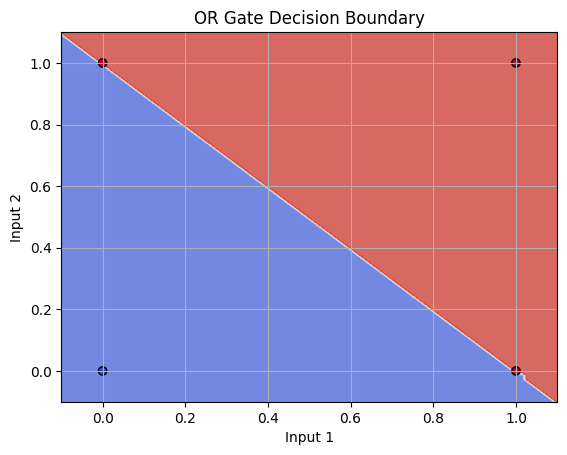

In [ ]:
# Visualize decision boundary

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = np.array([model.predict(point) for point in grid])
    preds = preds.reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.grid(True)
    plt.show()

plot_decision_boundary(and_perceptron, X_and, y_and, "AND Gate Decision Boundary")
plot_decision_boundary(or_perceptron, X_or, y_or, "OR Gate Decision Boundary")


###**AND function using perceptron networks for bipolar inputs and targets.**

In [ ]:
import numpy as np
import pandas as pd

class Perceptron:
    def __init__(self, learning_rate=1.0):
        self.alpha = learning_rate
        self.weights = None
        self.bias = None

    def activation_function(self, y_in):
        """AND function using Perceptron Rule"""
        if y_in > 0:
            return 1
        elif y_in == 0:
            return 0
        else:
            return -1

    def train(self, X, targets, epochs=1):
        """Train the perceptron using the learning rule"""
        n_samples, n_features = X.shape

        # Initialize weights and bias to 0
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Store training history
        history = []

        for epoch in range(epochs):
            print(f"\nEPOCH-{epoch + 1}")
            print("-" * 80)
            print(f"{'x1':>3} {'x2':>3} {'Target':>6} {'Net input':>10} {'Output':>8} {'Δw1':>6} {'Δw2':>6} {'Δb':>4} {'w1':>4} {'w2':>4} {'b':>4}")
            print("-" * 80)

            for i in range(n_samples):
                # Calculate net input
                y_in = self.bias + np.dot(X[i], self.weights)

                # Calculate output using activation function
                y = self.activation_function(y_in)

                # Calculate weight changes
                delta_w = self.alpha * targets[i] * X[i]
                delta_b = self.alpha * targets[i]

                # Update weights and bias
                self.weights += delta_w
                self.bias += delta_b

                # Print current iteration
                print(f"{X[i,0]:>3} {X[i,1]:>3} {targets[i]:>6} {y_in:>10} {y:>8} {delta_w[0]:>6} {delta_w[1]:>6} {delta_b:>4} {self.weights[0]:>4} {self.weights[1]:>4} {self.bias:>4}")

                # Store history
                history.append({
                    'epoch': epoch + 1,
                    'sample': i + 1,
                    'x1': X[i,0], 'x2': X[i,1],
                    'target': targets[i],
                    'y_in': y_in,
                    'output': y,
                    'delta_w1': delta_w[0],
                    'delta_w2': delta_w[1],
                    'delta_b': delta_b,
                    'w1': self.weights[0],
                    'w2': self.weights[1],
                    'b': self.bias
                })

        return history

    def predict(self, X):
        """Make predictions using trained perceptron"""
        predictions = []
        for sample in X:
            y_in = self.bias + np.dot(sample, self.weights)
            y = self.activation_function(y_in)
            predictions.append(y)
        return np.array(predictions)

# Define the training data for AND function
X = np.array([
    [1, 1],
    [1, -1],
    [-1, 1],
    [-1, -1]
])

targets = np.array([1, -1, -1, -1])  # AND function truth table

# Create and train perceptron
perceptron = Perceptron(learning_rate=1.0)
history = perceptron.train(X, targets, epochs=1)

print(f"\nFinal weights: w1 = {perceptron.weights[0]}, w2 = {perceptron.weights[1]}")
print(f"Final bias: b = {perceptron.bias}")

# Test the trained perceptron
print("\nTesting the trained perceptron:")
print("-" * 40)
print(f"{'Input':>10} {'Output':>8} {'Expected':>10}")
print("-" * 40)
for i, sample in enumerate(X):
    prediction = perceptron.predict([sample])[0]
    print(f"{sample}    {prediction:>4}    {targets[i]:>6}")

# Verify it implements AND function
print(f"\nThe perceptron has learned the AND function:")
print(f"Decision boundary: {perceptron.weights[0]}*x1 + {perceptron.weights[1]}*x2 + {perceptron.bias} = 0")


EPOCH-1
--------------------------------------------------------------------------------
 x1  x2 Target  Net input   Output    Δw1    Δw2   Δb   w1   w2    b
--------------------------------------------------------------------------------
  1   1      1        0.0        0    1.0    1.0  1.0  1.0  1.0  1.0
  1  -1     -1        1.0        1   -1.0    1.0 -1.0  0.0  2.0  0.0
 -1   1     -1        2.0        1    1.0   -1.0 -1.0  1.0  1.0 -1.0
 -1  -1     -1       -3.0       -1    1.0    1.0 -1.0  2.0  2.0 -2.0

Final weights: w1 = 2.0, w2 = 2.0
Final bias: b = -2.0

Testing the trained perceptron:
----------------------------------------
     Input   Output   Expected
----------------------------------------
[1 1]       1         1
[ 1 -1]      -1        -1
[-1  1]      -1        -1
[-1 -1]      -1        -1

The perceptron has learned the AND function:
Decision boundary: 2.0*x1 + 2.0*x2 + -2.0 = 0


Lab All chapters

Choose a lab to run:
1. Basic Neuron Model
2. Perceptron
3. Linear Regression
4. LMS Algorithm
5. Multilayer Perceptron
6. RBF Networks
7. Self-Organizing Maps
8. Recurrent Neural Networks
9. Run all labs
Enter your choice (1-9): 9
Neural Networks Laboratory Demonstrations

Lab 1: Basic Neuron Model
-------------------------
=== Laboratory 1: Basic Neuron Model ===
Neuron output: 0.3104


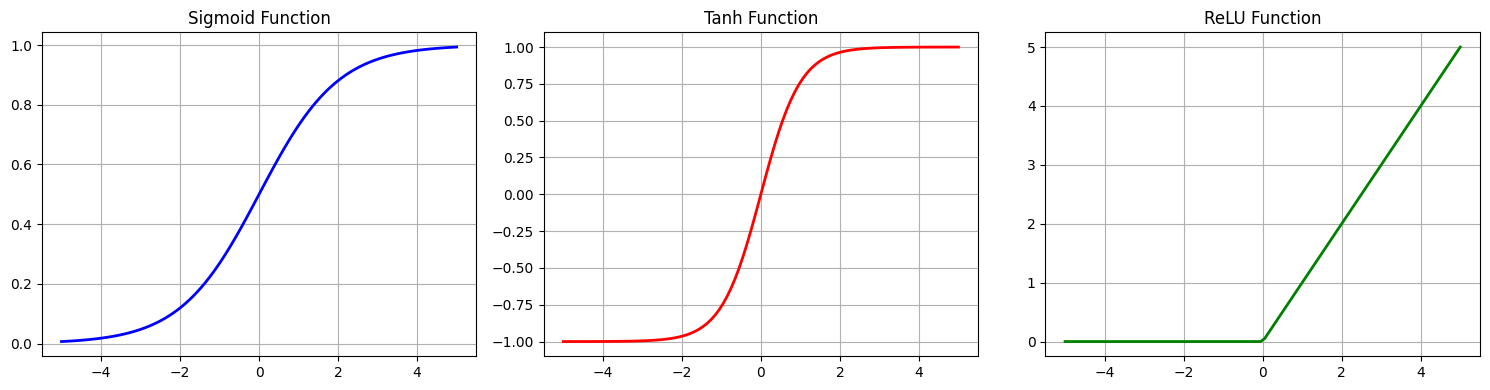

Network output shape: (5, 1)
Sample outputs: [0.4710901  0.45648166 0.48394602 0.4409864  0.41052559]
✓ Lab 1: Basic Neuron Model completed successfully


Lab 2: Perceptron
-----------------
=== Laboratory 2: Perceptron Implementation ===
Converged after 4 epochs
AND Gate Results:
  Input: [0 0], Target: 0, Prediction: 0
  Input: [0 1], Target: 0, Prediction: 0
  Input: [1 0], Target: 0, Prediction: 0
  Input: [1 1], Target: 1, Prediction: 1


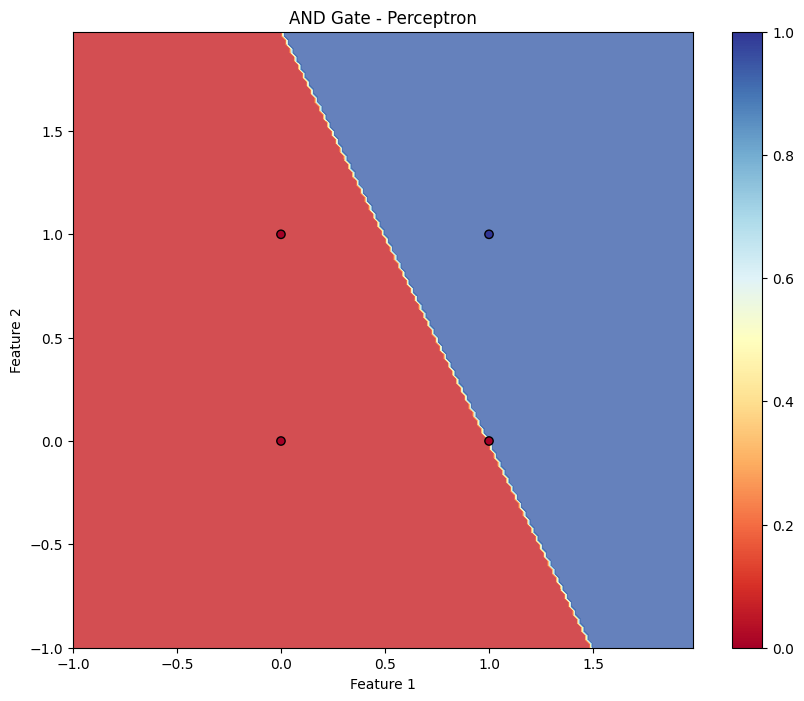


Trying XOR Gate (should not converge):
XOR Gate Results:
  Input: [0 0], Target: 0, Prediction: 1
  Input: [0 1], Target: 1, Prediction: 1
  Input: [1 0], Target: 1, Prediction: 0
  Input: [1 1], Target: 0, Prediction: 0
✓ Lab 2: Perceptron completed successfully


Lab 3: Linear Regression
------------------------
=== Laboratory 3: Linear Regression ===
Normal Equation Results:
  True weights: [ 3. -2.]
  Estimated weights: [ 3.0411274  -2.03461987]
  True bias: 1.5
  Estimated bias: 1.5247

Gradient Descent Results:
  Estimated weights: [ 3.03792567 -2.03428022]
  Estimated bias: 1.5233

Ridge Regression Results:
  Estimated weights: [ 2.67162665 -1.84369835]
  Estimated bias: 1.4647


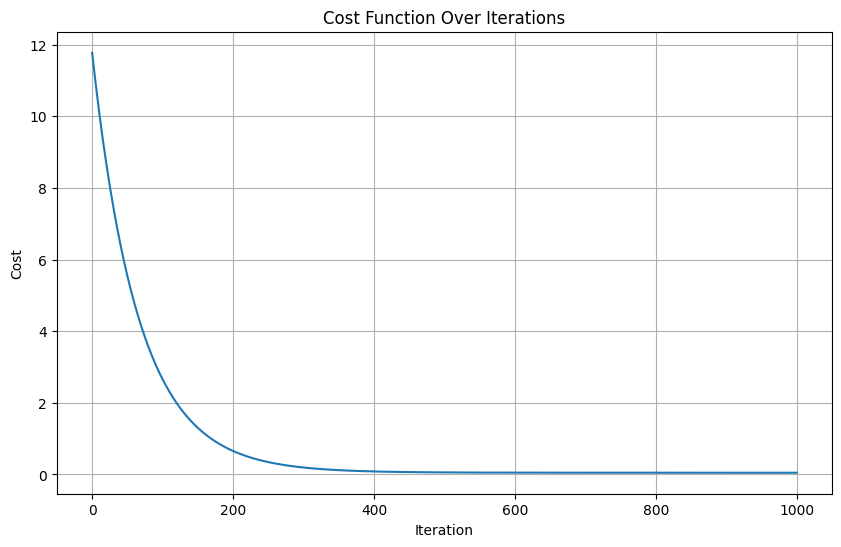

✓ Lab 3: Linear Regression completed successfully


Lab 4: LMS Algorithm
--------------------
=== Laboratory 4: LMS Algorithm ===
System Identification Results:
True system: [ 0.8 -0.4  0.2  0.1]
Estimated system: [ 0.20115601  0.0945771  -0.06295762  0.00480753]
Final MSE: 0.954318


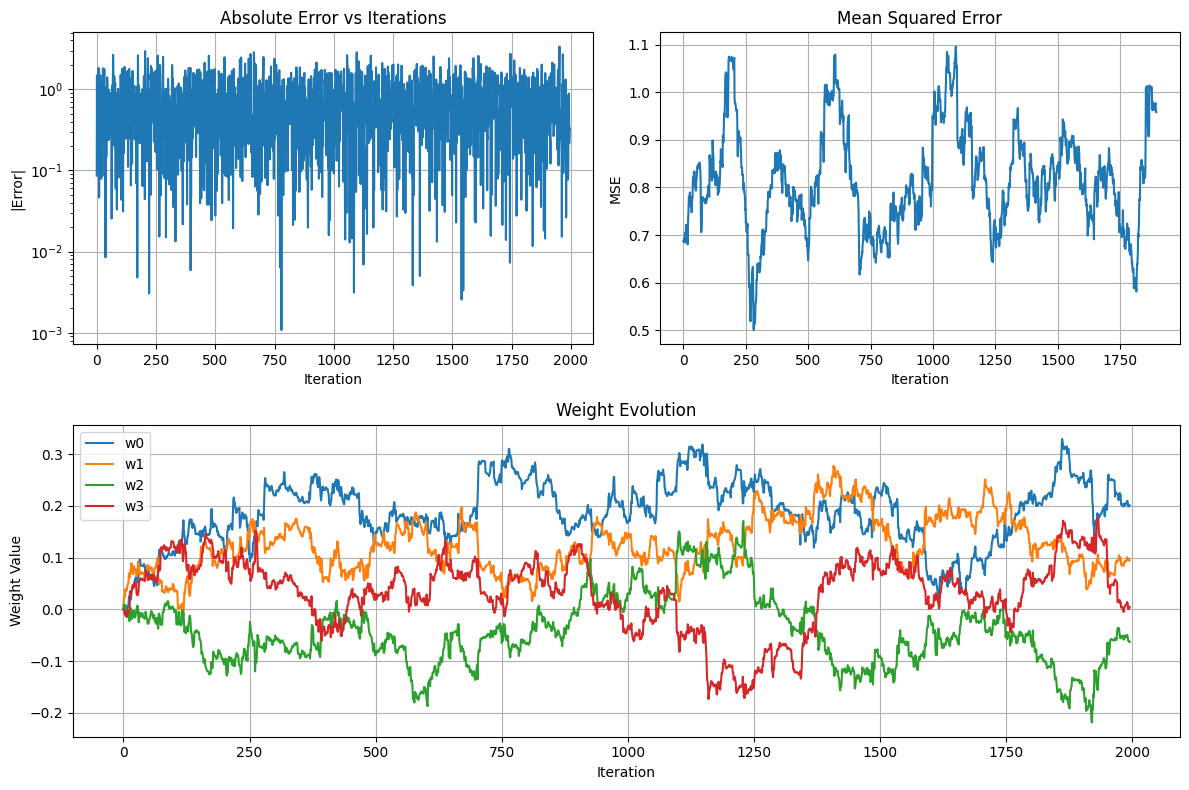

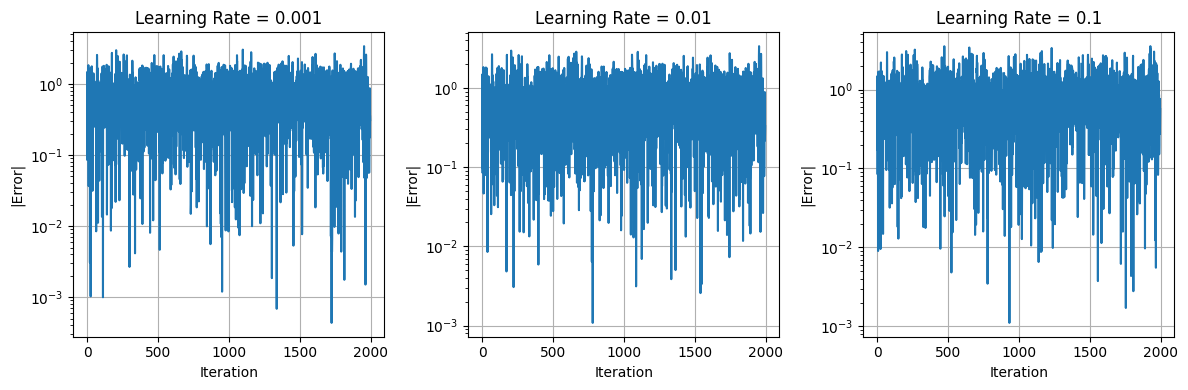

✓ Lab 4: LMS Algorithm completed successfully


Lab 5: Multilayer Perceptron
----------------------------
=== Laboratory 5: Multilayer Perceptron ===
XOR Problem Solution:
Input -> Target | Prediction | Probability
[0 0] -> 0 | 0 | 0.0616
[0 1] -> 1 | 1 | 0.9039
[1 0] -> 1 | 1 | 0.9085
[1 1] -> 0 | 0 | 0.1134


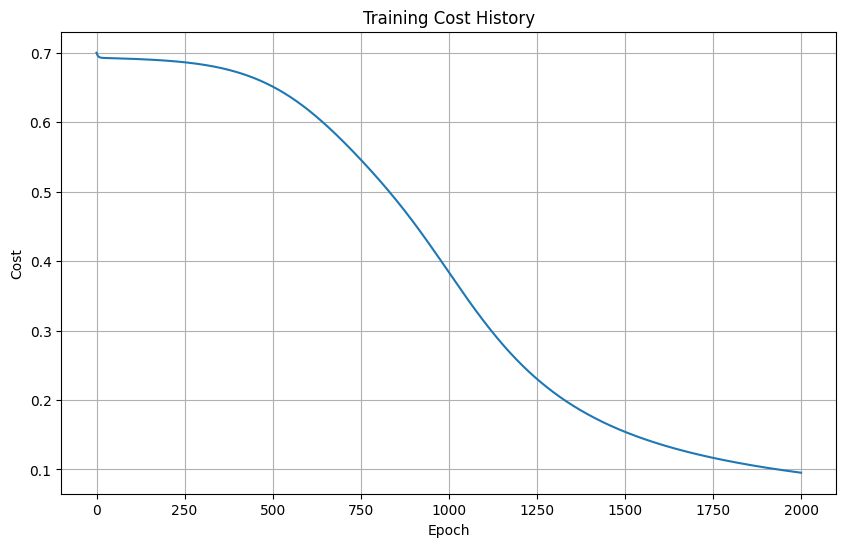

Epoch 0, Cost: 0.699552
Epoch 100, Cost: 0.659529
Epoch 200, Cost: 0.616491
Epoch 300, Cost: 0.574451
Epoch 400, Cost: 0.532607
Epoch 500, Cost: 0.491286
Epoch 600, Cost: 0.450104
Epoch 700, Cost: 0.411261
Epoch 800, Cost: 0.375943
Epoch 900, Cost: 0.347197

Circles Classification Results:
Training Accuracy: 0.9958
Test Accuracy: 1.0000


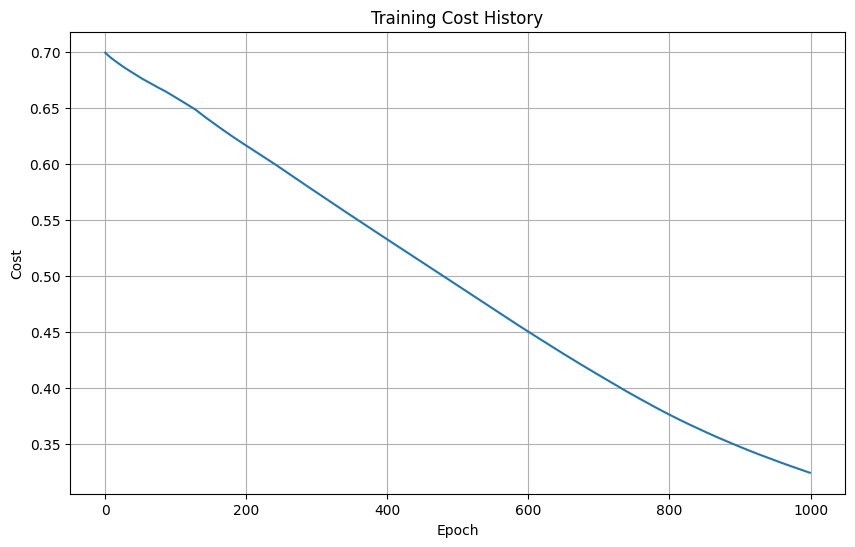

✓ Lab 5: Multilayer Perceptron completed successfully


Lab 6: RBF Networks
-------------------
=== Laboratory 6: RBF Networks ===


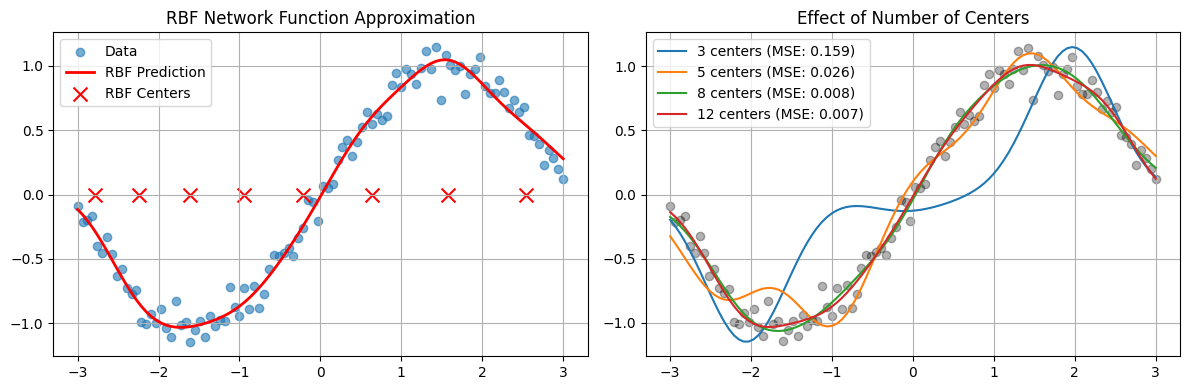

RBF vs MLP Comparison:
RBF Accuracy: 1.0000
MLP Accuracy: 1.0000


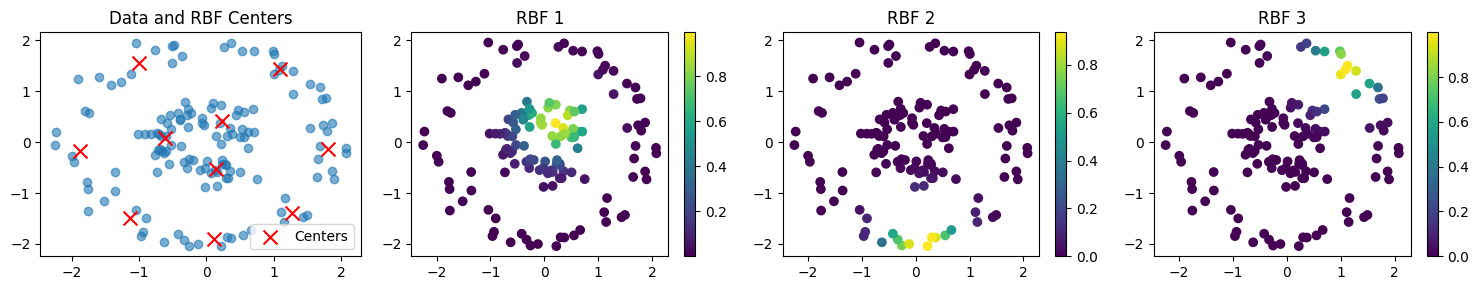

✓ Lab 6: RBF Networks completed successfully


Lab 7: Self-Organizing Maps
---------------------------
=== Laboratory 7: Self-Organizing Maps ===
Epoch 0/500
Epoch 100/500
Epoch 200/500
Epoch 300/500
Epoch 400/500


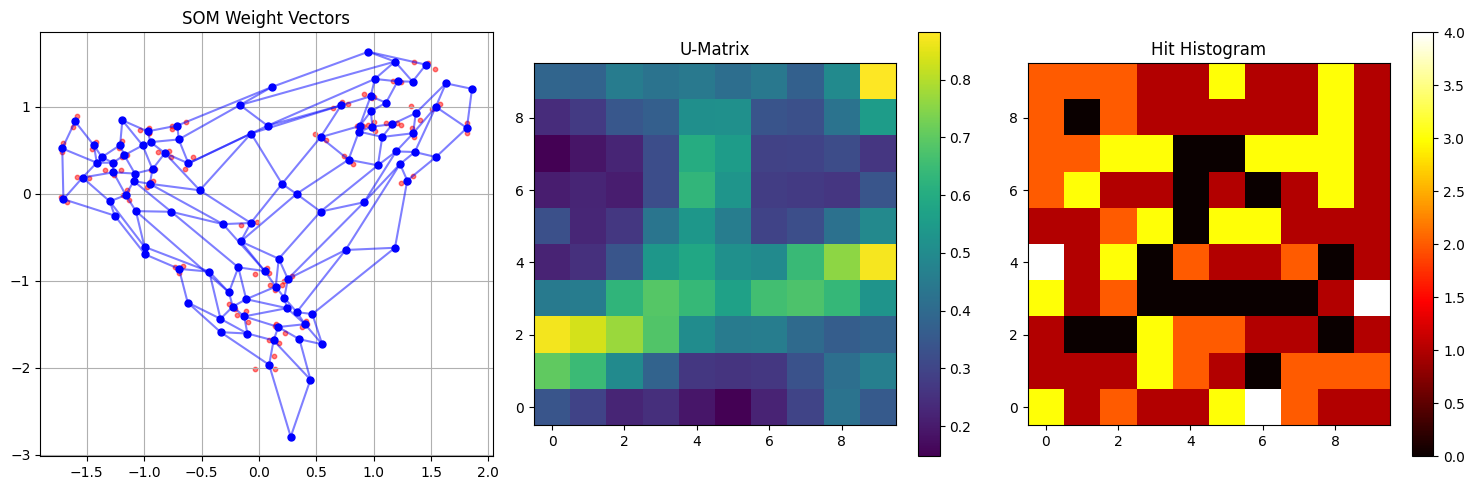

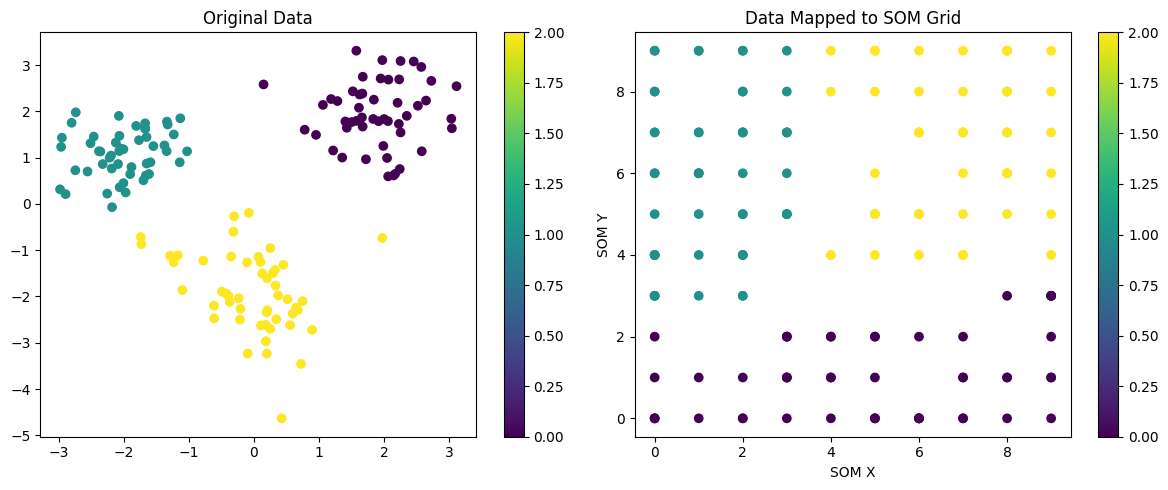

✓ Lab 7: Self-Organizing Maps completed successfully


Lab 8: Recurrent Neural Networks
--------------------------------
=== Laboratory 8: Recurrent Neural Networks ===
Training RNN...
Epoch 0, Average Loss: 0.419302
Epoch 20, Average Loss: 0.377977
Epoch 40, Average Loss: 0.373701
Epoch 60, Average Loss: 0.372504
Epoch 80, Average Loss: 0.373744


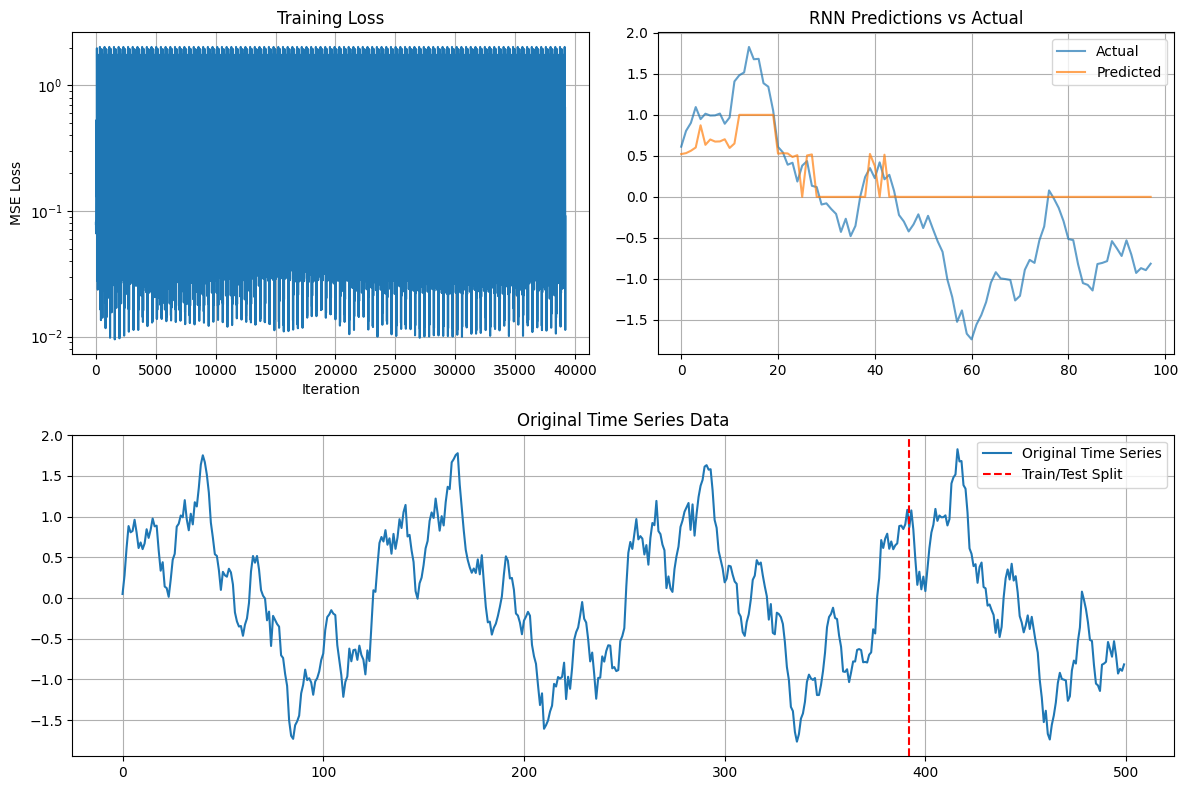


Test MSE: 0.491830
✓ Lab 8: Recurrent Neural Networks completed successfully



In [8]:
# ============================================================================
# Neural Networks Laboratory Code Implementations
# Course: CSC372 - Neural Networks
# For Bachelor's Level IT & Engineering Students
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from typing import Tuple, List, Optional
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# Laboratory 1: Basic Neuron Model and Network Visualization
# ============================================================================

class BasicNeuron:
    """Implementation of a basic artificial neuron"""

    def __init__(self, n_inputs: int, activation: str = 'sigmoid'):
        self.weights = np.random.randn(n_inputs) * 0.5
        self.bias = np.random.randn() * 0.5
        self.activation = activation

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

    def tanh(self, x):
        return np.tanh(x)

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, inputs):
        z = np.dot(inputs, self.weights) + self.bias
        if self.activation == 'sigmoid':
            return self.sigmoid(z)
        elif self.activation == 'tanh':
            return self.tanh(z)
        elif self.activation == 'relu':
            return self.relu(z)
        else:
            return z

def plot_activation_functions():
    """Plot and compare different activation functions"""
    x = np.linspace(-5, 5, 100)

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Sigmoid
    sigmoid = 1 / (1 + np.exp(-x))
    axes[0].plot(x, sigmoid, 'b-', linewidth=2)
    axes[0].set_title('Sigmoid Function')
    axes[0].grid(True)

    # Tanh
    tanh = np.tanh(x)
    axes[1].plot(x, tanh, 'r-', linewidth=2)
    axes[1].set_title('Tanh Function')
    axes[1].grid(True)

    # ReLU
    relu = np.maximum(0, x)
    axes[2].plot(x, relu, 'g-', linewidth=2)
    axes[2].set_title('ReLU Function')
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()

class SimpleNetwork:
    """Simple 3-layer neural network for demonstration"""

    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights
        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.5
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

def lab1_demo():
    """Lab 1 demonstration"""
    print("=== Laboratory 1: Basic Neuron Model ===")

    # Create a basic neuron
    neuron = BasicNeuron(3, activation='sigmoid')
    inputs = np.array([0.5, -0.2, 0.8])
    output = neuron.forward(inputs)
    print(f"Neuron output: {output:.4f}")

    # Plot activation functions
    plot_activation_functions()

    # Create simple network
    network = SimpleNetwork(2, 4, 1)
    X = np.random.randn(5, 2)
    output = network.forward(X)
    print(f"Network output shape: {output.shape}")
    print(f"Sample outputs: {output.flatten()}")

# ============================================================================
# Laboratory 2: Perceptron Implementation
# ============================================================================

class Perceptron:
    """Rosenblatt's Perceptron implementation"""

    def __init__(self, learning_rate: float = 0.1, max_iter: int = 1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
        self.errors = []

    def activation(self, x):
        """Step function activation"""
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        """Train the perceptron"""
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training loop
        for epoch in range(self.max_iter):
            errors = 0
            for i in range(n_samples):
                # Forward pass
                linear_output = np.dot(X[i], self.weights) + self.bias
                prediction = self.activation(linear_output)

                # Update weights if prediction is wrong
                error = y[i] - prediction
                if error != 0:
                    self.weights += self.learning_rate * error * X[i]
                    self.bias += self.learning_rate * error
                    errors += 1

            self.errors.append(errors)
            if errors == 0:
                print(f"Converged after {epoch + 1} epochs")
                break

        return self

    def predict(self, X):
        """Make predictions"""
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)

    def plot_decision_boundary(self, X, y, title="Perceptron Decision Boundary"):
        """Plot decision boundary"""
        plt.figure(figsize=(10, 8))

        # Create a mesh
        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))

        # Make predictions on mesh
        mesh_points = np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(mesh_points)
        Z = Z.reshape(xx.shape)

        # Plot
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
        scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
        plt.colorbar(scatter)
        plt.title(title)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

def create_logic_gate_data(gate_type: str):
    """Create data for logic gates"""
    if gate_type.upper() == 'AND':
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 0, 0, 1])
    elif gate_type.upper() == 'OR':
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 1, 1, 1])
    elif gate_type.upper() == 'XOR':
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 1, 1, 0])
    else:
        raise ValueError("Supported gates: AND, OR, XOR")

    return X, y

def lab2_demo():
    """Lab 2 demonstration"""
    print("=== Laboratory 2: Perceptron Implementation ===")

    # AND Gate
    X_and, y_and = create_logic_gate_data('AND')
    perceptron_and = Perceptron(learning_rate=0.1, max_iter=100)
    perceptron_and.fit(X_and, y_and)

    predictions = perceptron_and.predict(X_and)
    print("AND Gate Results:")
    for i, (input_vals, target, pred) in enumerate(zip(X_and, y_and, predictions)):
        print(f"  Input: {input_vals}, Target: {target}, Prediction: {pred}")

    # Plot decision boundary
    perceptron_and.plot_decision_boundary(X_and, y_and, "AND Gate - Perceptron")

    # XOR Gate (will not converge)
    print("\nTrying XOR Gate (should not converge):")
    X_xor, y_xor = create_logic_gate_data('XOR')
    perceptron_xor = Perceptron(learning_rate=0.1, max_iter=100)
    perceptron_xor.fit(X_xor, y_xor)

    predictions_xor = perceptron_xor.predict(X_xor)
    print("XOR Gate Results:")
    for i, (input_vals, target, pred) in enumerate(zip(X_xor, y_xor, predictions_xor)):
        print(f"  Input: {input_vals}, Target: {target}, Prediction: {pred}")

# ============================================================================
# Laboratory 3: Linear Regression Implementation
# ============================================================================

class LinearRegression:
    """Linear Regression with different solvers"""

    def __init__(self, method: str = 'normal', learning_rate: float = 0.01,
                 max_iter: int = 1000, regularization: str = None, alpha: float = 0.01):
        self.method = method
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.regularization = regularization
        self.alpha = alpha
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        """Fit the linear regression model"""
        n_samples, n_features = X.shape

        if self.method == 'normal':
            self._fit_normal_equation(X, y)
        elif self.method == 'gradient_descent':
            self._fit_gradient_descent(X, y)
        else:
            raise ValueError("Method must be 'normal' or 'gradient_descent'")

        return self

    def _fit_normal_equation(self, X, y):
        """Fit using normal equation"""
        # Add bias term
        X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]

        if self.regularization == 'ridge':
            # Ridge regression
            I = np.eye(X_with_bias.shape[1])
            I[0, 0] = 0  # Don't regularize bias
            params = np.linalg.inv(X_with_bias.T @ X_with_bias + self.alpha * I) @ X_with_bias.T @ y
        else:
            # Ordinary least squares
            params = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y

        self.bias = params[0]
        self.weights = params[1:]

    def _fit_gradient_descent(self, X, y):
        """Fit using gradient descent"""
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for i in range(self.max_iter):
            # Forward pass
            y_pred = self.predict(X)

            # Compute cost
            cost = self._compute_cost(y, y_pred)
            self.cost_history.append(cost)

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # Add regularization
            if self.regularization == 'ridge':
                dw += self.alpha * self.weights
            elif self.regularization == 'lasso':
                dw += self.alpha * np.sign(self.weights)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def _compute_cost(self, y_true, y_pred):
        """Compute mean squared error cost"""
        mse = np.mean((y_true - y_pred) ** 2)

        # Add regularization term
        if self.regularization == 'ridge':
            mse += self.alpha * np.sum(self.weights ** 2)
        elif self.regularization == 'lasso':
            mse += self.alpha * np.sum(np.abs(self.weights))

        return mse

    def predict(self, X):
        """Make predictions"""
        return np.dot(X, self.weights) + self.bias

    def plot_cost_history(self):
        """Plot cost function over iterations"""
        if self.cost_history:
            plt.figure(figsize=(10, 6))
            plt.plot(self.cost_history)
            plt.title('Cost Function Over Iterations')
            plt.xlabel('Iteration')
            plt.ylabel('Cost')
            plt.grid(True)
            plt.show()

def generate_regression_data(n_samples: int = 100, noise: float = 0.1):
    """Generate synthetic regression data"""
    np.random.seed(42)
    X = np.random.randn(n_samples, 2)
    true_weights = np.array([3.0, -2.0])
    true_bias = 1.5
    y = X @ true_weights + true_bias + noise * np.random.randn(n_samples)
    return X, y, true_weights, true_bias

def lab3_demo():
    """Lab 3 demonstration"""
    print("=== Laboratory 3: Linear Regression ===")

    # Generate data
    X, y, true_weights, true_bias = generate_regression_data(100, 0.2)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normal equation
    lr_normal = LinearRegression(method='normal')
    lr_normal.fit(X_train, y_train)
    print("Normal Equation Results:")
    print(f"  True weights: {true_weights}")
    print(f"  Estimated weights: {lr_normal.weights}")
    print(f"  True bias: {true_bias}")
    print(f"  Estimated bias: {lr_normal.bias:.4f}")

    # Gradient descent
    lr_gd = LinearRegression(method='gradient_descent', learning_rate=0.01, max_iter=1000)
    lr_gd.fit(X_train, y_train)
    print("\nGradient Descent Results:")
    print(f"  Estimated weights: {lr_gd.weights}")
    print(f"  Estimated bias: {lr_gd.bias:.4f}")

    # Ridge regression
    lr_ridge = LinearRegression(method='gradient_descent', regularization='ridge', alpha=0.1)
    lr_ridge.fit(X_train, y_train)
    print("\nRidge Regression Results:")
    print(f"  Estimated weights: {lr_ridge.weights}")
    print(f"  Estimated bias: {lr_ridge.bias:.4f}")

    # Plot cost history
    lr_gd.plot_cost_history()

# ============================================================================
# Laboratory 4: LMS Algorithm Implementation
# ============================================================================

class LMSFilter:
    """Least Mean Squares Adaptive Filter"""

    def __init__(self, n_taps: int, learning_rate: float = 0.01):
        self.n_taps = n_taps
        self.learning_rate = learning_rate
        self.weights = np.zeros(n_taps)
        self.error_history = []
        self.weight_history = []

    def filter(self, x: np.ndarray, d: np.ndarray):
        """Apply LMS filtering"""
        n_samples = len(x)
        y = np.zeros(n_samples)

        for n in range(self.n_taps, n_samples):
            # Extract input vector
            x_n = x[n-self.n_taps:n][::-1]  # Reverse for convolution

            # Filter output
            y[n] = np.dot(self.weights, x_n)

            # Error calculation
            error = d[n] - y[n]
            self.error_history.append(error)

            # Weight update (LMS algorithm)
            self.weights += self.learning_rate * error * x_n
            self.weight_history.append(self.weights.copy())

        return y

    def plot_learning_curve(self):
        """Plot learning curve"""
        plt.figure(figsize=(12, 8))

        # Error vs iterations
        plt.subplot(2, 2, 1)
        plt.plot(np.abs(self.error_history))
        plt.title('Absolute Error vs Iterations')
        plt.xlabel('Iteration')
        plt.ylabel('|Error|')
        plt.yscale('log')
        plt.grid(True)

        # Mean squared error
        plt.subplot(2, 2, 2)
        window_size = 100
        mse = []
        for i in range(window_size, len(self.error_history)):
            mse.append(np.mean(np.array(self.error_history[i-window_size:i])**2))
        plt.plot(mse)
        plt.title('Mean Squared Error')
        plt.xlabel('Iteration')
        plt.ylabel('MSE')
        plt.grid(True)

        # Weight evolution
        plt.subplot(2, 1, 2)
        weight_history = np.array(self.weight_history)
        for i in range(self.n_taps):
            plt.plot(weight_history[:, i], label=f'w{i}')
        plt.title('Weight Evolution')
        plt.xlabel('Iteration')
        plt.ylabel('Weight Value')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

def generate_system_identification_data(n_samples: int = 1000):
    """Generate data for system identification"""
    np.random.seed(42)

    # Unknown system (FIR filter)
    unknown_system = np.array([0.8, -0.4, 0.2, 0.1])

    # Input signal (white noise)
    x = np.random.randn(n_samples)

    # Desired output (system response + noise)
    d = np.convolve(x, unknown_system, mode='same') + 0.1 * np.random.randn(n_samples)

    return x, d, unknown_system

def lab4_demo():
    """Lab 4 demonstration"""
    print("=== Laboratory 4: LMS Algorithm ===")

    # System identification
    x, d, true_system = generate_system_identification_data(2000)

    # LMS filter
    lms = LMSFilter(n_taps=4, learning_rate=0.01)
    y = lms.filter(x, d)

    print("System Identification Results:")
    print(f"True system: {true_system}")
    print(f"Estimated system: {lms.weights}")
    print(f"Final MSE: {np.mean(np.array(lms.error_history[-100:])**2):.6f}")

    # Plot results
    lms.plot_learning_curve()

    # Compare different learning rates
    learning_rates = [0.001, 0.01, 0.1]
    plt.figure(figsize=(12, 4))

    for i, lr in enumerate(learning_rates):
        lms_temp = LMSFilter(n_taps=4, learning_rate=lr)
        lms_temp.filter(x, d)

        plt.subplot(1, 3, i+1)
        plt.plot(np.abs(lms_temp.error_history))
        plt.title(f'Learning Rate = {lr}')
        plt.xlabel('Iteration')
        plt.ylabel('|Error|')
        plt.yscale('log')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# ============================================================================
# Laboratory 5: Multilayer Perceptron and Backpropagation
# ============================================================================

class MLP:
    """Multilayer Perceptron with Backpropagation"""

    def __init__(self, layers: List[int], learning_rate: float = 0.01,
                 activation: str = 'sigmoid', regularization: str = None,
                 lambda_reg: float = 0.01):
        self.layers = layers
        self.learning_rate = learning_rate
        self.activation = activation
        self.regularization = regularization
        self.lambda_reg = lambda_reg
        self.weights = []
        self.biases = []
        self.cost_history = []

        # Initialize weights and biases
        for i in range(len(layers) - 1):
            # Xavier initialization
            w = np.random.randn(layers[i], layers[i+1]) / np.sqrt(layers[i])
            b = np.zeros((1, layers[i+1]))
            self.weights.append(w)
            self.biases.append(b)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - x**2

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def activate(self, x):
        if self.activation == 'sigmoid':
            return self.sigmoid(x)
        elif self.activation == 'tanh':
            return self.tanh(x)
        elif self.activation == 'relu':
            return self.relu(x)

    def activate_derivative(self, x):
        if self.activation == 'sigmoid':
            return self.sigmoid_derivative(x)
        elif self.activation == 'tanh':
            return self.tanh_derivative(x)
        elif self.activation == 'relu':
            return self.relu_derivative(x)

    def forward_propagation(self, X):
        """Forward propagation through the network"""
        self.layer_inputs = [X]
        self.layer_outputs = [X]

        current_input = X
        for i in range(len(self.weights)):
            z = np.dot(current_input, self.weights[i]) + self.biases[i]
            self.layer_inputs.append(z)

            if i < len(self.weights) - 1:  # Hidden layers
                a = self.activate(z)
            else:  # Output layer
                a = self.sigmoid(z)  # Always sigmoid for output

            self.layer_outputs.append(a)
            current_input = a

        return current_input

    def backward_propagation(self, X, y):
        """Backward propagation to compute gradients"""
        m = X.shape[0]

        # Initialize gradients
        dW = [np.zeros_like(w) for w in self.weights]
        db = [np.zeros_like(b) for b in self.biases]

        # Output layer error
        output_error = self.layer_outputs[-1] - y
        delta = output_error * self.sigmoid_derivative(self.layer_outputs[-1])

        # Backpropagate error
        for i in range(len(self.weights) - 1, -1, -1):
            # Compute gradients
            dW[i] = np.dot(self.layer_outputs[i].T, delta) / m
            db[i] = np.mean(delta, axis=0, keepdims=True)

            # Add regularization
            if self.regularization == 'l2':
                dW[i] += self.lambda_reg * self.weights[i]
            elif self.regularization == 'l1':
                dW[i] += self.lambda_reg * np.sign(self.weights[i])

            # Propagate error to previous layer
            if i > 0:
                delta = np.dot(delta, self.weights[i].T) * self.activate_derivative(self.layer_outputs[i])

        return dW, db

    def fit(self, X, y, epochs: int = 1000, verbose: bool = True):
        """Train the MLP"""
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward_propagation(X)

            # Compute cost
            cost = self.compute_cost(y, output)
            self.cost_history.append(cost)

            # Backward propagation
            dW, db = self.backward_propagation(X, y)

            # Update weights and biases
            for i in range(len(self.weights)):
                self.weights[i] -= self.learning_rate * dW[i]
                self.biases[i] -= self.learning_rate * db[i]

            if verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}, Cost: {cost:.6f}")

        return self

    def compute_cost(self, y_true, y_pred):
        """Compute cross-entropy cost"""
        m = y_true.shape[0]
        cost = -np.mean(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))

        # Add regularization
        if self.regularization == 'l2':
            l2_cost = sum(np.sum(w**2) for w in self.weights)
            cost += self.lambda_reg * l2_cost / (2 * m)
        elif self.regularization == 'l1':
            l1_cost = sum(np.sum(np.abs(w)) for w in self.weights)
            cost += self.lambda_reg * l1_cost / m

        return cost

    def predict(self, X):
        """Make predictions"""
        output = self.forward_propagation(X)
        return (output > 0.5).astype(int)

    def predict_proba(self, X):
        """Predict probabilities"""
        return self.forward_propagation(X)

    def plot_training_history(self):
        """Plot training cost history"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.cost_history)
        plt.title('Training Cost History')
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.grid(True)
        plt.show()

def solve_xor_problem():
    """Solve XOR problem using MLP"""
    # XOR data
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Create and train MLP
    mlp = MLP(layers=[2, 4, 1], learning_rate=1.0, activation='sigmoid')
    mlp.fit(X, y, epochs=2000, verbose=False)

    # Test predictions
    predictions = mlp.predict(X)
    probabilities = mlp.predict_proba(X)

    print("XOR Problem Solution:")
    print("Input -> Target | Prediction | Probability")
    for i in range(len(X)):
        print(f"{X[i]} -> {y[i][0]} | {predictions[i][0]} | {probabilities[i][0]:.4f}")

    return mlp

def lab5_demo():
    """Lab 5 demonstration"""
    print("=== Laboratory 5: Multilayer Perceptron ===")

    # Solve XOR problem
    mlp_xor = solve_xor_problem()
    mlp_xor.plot_training_history()

    # Generate more complex classification data
    X, y = make_circles(n_samples=300, noise=0.1, factor=0.3, random_state=42)
    y = y.reshape(-1, 1)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train MLP
    mlp = MLP(layers=[2, 10, 5, 1], learning_rate=0.1, activation='relu',
              regularization='l2', lambda_reg=0.01)
    mlp.fit(X_train_scaled, y_train, epochs=1000, verbose=True)

    # Evaluate
    train_accuracy = np.mean(mlp.predict(X_train_scaled) == y_train)
    test_accuracy = np.mean(mlp.predict(X_test_scaled) == y_test)

    print(f"\nCircles Classification Results:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Plot training history
    mlp.plot_training_history()

# ============================================================================
# Laboratory 6: RBF Networks Implementation
# ============================================================================

class RBFNetwork:
    """Radial Basis Function Network"""

    def __init__(self, n_centers: int, sigma: float = 1.0):
        self.n_centers = n_centers
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def gaussian_rbf(self, x, center):
        """Gaussian radial basis function"""
        distance = np.linalg.norm(x - center, axis=1)
        return np.exp(-(distance ** 2) / (2 * self.sigma ** 2))

    def k_means_centers(self, X, max_iter: int = 100):
        """Find RBF centers using K-means clustering"""
        n_samples, n_features = X.shape

        # Initialize centers randomly
        self.centers = X[np.random.choice(n_samples, self.n_centers, replace=False)]

        for _ in range(max_iter):
            # Assign points to closest centers
            distances = np.sqrt(((X - self.centers[:, np.newaxis])**2).sum(axis=2))
            closest_centers = np.argmin(distances, axis=0)

            # Update centers
            new_centers = np.array([X[closest_centers == k].mean(axis=0)
                                  for k in range(self.n_centers)])

            # Check for convergence
            if np.allclose(self.centers, new_centers):
                break

            self.centers = new_centers

    def compute_design_matrix(self, X):
        """Compute the design matrix (RBF activations)"""
        n_samples = X.shape[0]
        phi = np.zeros((n_samples, self.n_centers))

        for i, center in enumerate(self.centers):
            phi[:, i] = self.gaussian_rbf(X, center)

        return phi

    def fit(self, X, y):
        """Train the RBF network"""
        # Find centers using K-means
        self.k_means_centers(X)

        # Compute design matrix
        phi = self.compute_design_matrix(X)

        # Solve for weights using least squares
        self.weights = np.linalg.pinv(phi) @ y

        return self

    def predict(self, X):
        """Make predictions"""
        phi = self.compute_design_matrix(X)
        return phi @ self.weights

    def plot_rbf_functions(self, X):
        """Plot RBF functions"""
        if X.shape[1] == 2:
            plt.figure(figsize=(15, 3))

            # Plot original data
            plt.subplot(1, 4, 1)
            plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
            plt.scatter(self.centers[:, 0], self.centers[:, 1],
                       c='red', s=100, marker='x', label='Centers')
            plt.title('Data and RBF Centers')
            plt.legend()

            # Plot individual RBF functions
            for i in range(min(3, self.n_centers)):
                plt.subplot(1, 4, i + 2)
                phi = self.gaussian_rbf(X, self.centers[i])
                scatter = plt.scatter(X[:, 0], X[:, 1], c=phi, cmap='viridis')
                plt.colorbar(scatter)
                plt.title(f'RBF {i+1}')

            plt.tight_layout()
            plt.show()

def compare_rbf_mlp():
    """Compare RBF network with MLP"""
    # Generate data
    X, y = make_circles(n_samples=200, noise=0.1, factor=0.3, random_state=42)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # RBF Network
    rbf = RBFNetwork(n_centers=10, sigma=0.5)
    rbf.fit(X_train_scaled, y_train)
    rbf_pred = (rbf.predict(X_test_scaled) > 0.5).astype(int)
    rbf_accuracy = np.mean(rbf_pred == y_test)

    # MLP
    mlp = MLP(layers=[2, 10, 1], learning_rate=0.1, activation='relu')
    mlp.fit(X_train_scaled, y_train.reshape(-1, 1), epochs=500, verbose=False)
    mlp_pred = mlp.predict(X_test_scaled).flatten()
    mlp_accuracy = np.mean(mlp_pred == y_test)

    print("RBF vs MLP Comparison:")
    print(f"RBF Accuracy: {rbf_accuracy:.4f}")
    print(f"MLP Accuracy: {mlp_accuracy:.4f}")

    # Plot RBF functions
    rbf.plot_rbf_functions(X_train_scaled)

    return rbf, mlp

def lab6_demo():
    """Lab 6 demonstration"""
    print("=== Laboratory 6: RBF Networks ===")

    # Function approximation
    np.random.seed(42)
    X = np.linspace(-3, 3, 100).reshape(-1, 1)
    y = np.sin(X).flatten() + 0.1 * np.random.randn(100)

    # Train RBF network
    rbf = RBFNetwork(n_centers=8, sigma=0.5)
    rbf.fit(X, y)

    # Make predictions
    y_pred = rbf.predict(X)

    # Plot results
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(X, y, alpha=0.6, label='Data')
    plt.plot(X, y_pred, 'r-', linewidth=2, label='RBF Prediction')
    plt.scatter(rbf.centers, np.zeros(len(rbf.centers)),
               c='red', s=100, marker='x', label='RBF Centers')
    plt.title('RBF Network Function Approximation')
    plt.legend()
    plt.grid(True)

    # Compare with different numbers of centers
    plt.subplot(1, 2, 2)
    centers_list = [3, 5, 8, 12]
    for n_centers in centers_list:
        rbf_temp = RBFNetwork(n_centers=n_centers, sigma=0.5)
        rbf_temp.fit(X, y)
        y_pred_temp = rbf_temp.predict(X)
        mse = np.mean((y - y_pred_temp)**2)
        plt.plot(X, y_pred_temp, label=f'{n_centers} centers (MSE: {mse:.3f})')

    plt.scatter(X, y, alpha=0.3, c='black')
    plt.title('Effect of Number of Centers')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Classification comparison
    compare_rbf_mlp()

# ============================================================================
# Laboratory 7: Self-Organizing Maps (SOM)
# ============================================================================

class SOM:
    """Self-Organizing Map (Kohonen Network)"""

    def __init__(self, width: int, height: int, input_dim: int,
                 learning_rate: float = 0.5, neighborhood_radius: float = None):
        self.width = width
        self.height = height
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.neighborhood_radius = neighborhood_radius or max(width, height) / 2

        # Initialize weights randomly
        self.weights = np.random.random((width, height, input_dim))

        # Create coordinate grid
        self.coordinates = np.array([[i, j] for i in range(width) for j in range(height)])

    def find_bmu(self, sample):
        """Find Best Matching Unit (BMU)"""
        distances = np.sum((self.weights - sample) ** 2, axis=2)
        bmu_idx = np.unravel_index(np.argmin(distances), distances.shape)
        return bmu_idx

    def neighborhood_function(self, distance, radius):
        """Gaussian neighborhood function"""
        return np.exp(-(distance ** 2) / (2 * radius ** 2))

    def update_weights(self, sample, bmu_idx, iteration, total_iterations):
        """Update weights using SOM learning rule"""
        # Decay learning rate and neighborhood radius
        current_learning_rate = self.learning_rate * (1 - iteration / total_iterations)
        current_radius = self.neighborhood_radius * (1 - iteration / total_iterations)

        # Calculate distances from BMU
        bmu_coord = np.array(bmu_idx)
        for i in range(self.width):
            for j in range(self.height):
                node_coord = np.array([i, j])
                distance = np.linalg.norm(node_coord - bmu_coord)

                # Update if within neighborhood
                if distance <= current_radius:
                    influence = self.neighborhood_function(distance, current_radius)
                    self.weights[i, j] += (current_learning_rate * influence *
                                         (sample - self.weights[i, j]))

    def train(self, data, epochs: int):
        """Train the SOM"""
        n_samples = len(data)

        for epoch in range(epochs):
            for iteration in range(n_samples):
                sample = data[np.random.randint(0, n_samples)]
                bmu_idx = self.find_bmu(sample)
                self.update_weights(sample, bmu_idx,
                                  epoch * n_samples + iteration,
                                  epochs * n_samples)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}/{epochs}")

    def map_data(self, data):
        """Map data to SOM grid"""
        mapped = np.zeros((len(data), 2))
        for i, sample in enumerate(data):
            bmu_idx = self.find_bmu(sample)
            mapped[i] = bmu_idx
        return mapped

    def get_u_matrix(self):
        """Calculate U-matrix (unified distance matrix)"""
        u_matrix = np.zeros((self.width, self.height))

        for i in range(self.width):
            for j in range(self.height):
                neighbors = []

                # Get neighbors
                for di in [-1, 0, 1]:
                    for dj in [-1, 0, 1]:
                        ni, nj = i + di, j + dj
                        if 0 <= ni < self.width and 0 <= nj < self.height and (di != 0 or dj != 0):
                            neighbors.append(self.weights[ni, nj])

                # Calculate average distance to neighbors
                if neighbors:
                    distances = [np.linalg.norm(self.weights[i, j] - neighbor)
                               for neighbor in neighbors]
                    u_matrix[i, j] = np.mean(distances)

        return u_matrix

    def visualize_som(self, data=None, labels=None):
        """Visualize SOM"""
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # Weight visualization (for 2D input)
        if self.input_dim == 2:
            axes[0].set_title('SOM Weight Vectors')
            for i in range(self.width):
                for j in range(self.height):
                    axes[0].plot(self.weights[i, j, 0], self.weights[i, j, 1], 'bo', markersize=5)
                    # Connect neighbors
                    if i < self.width - 1:
                        axes[0].plot([self.weights[i, j, 0], self.weights[i+1, j, 0]],
                                   [self.weights[i, j, 1], self.weights[i+1, j, 1]], 'b-', alpha=0.5)
                    if j < self.height - 1:
                        axes[0].plot([self.weights[i, j, 0], self.weights[i, j+1, 0]],
                                   [self.weights[i, j, 1], self.weights[i, j+1, 1]], 'b-', alpha=0.5)

            if data is not None:
                axes[0].scatter(data[:, 0], data[:, 1], c='red', alpha=0.5, s=10)
            axes[0].grid(True)

        # U-Matrix
        u_matrix = self.get_u_matrix()
        im1 = axes[1].imshow(u_matrix.T, cmap='viridis', origin='lower')
        axes[1].set_title('U-Matrix')
        plt.colorbar(im1, ax=axes[1])

        # Hit histogram
        if data is not None:
            hit_histogram = np.zeros((self.width, self.height))
            for sample in data:
                bmu_idx = self.find_bmu(sample)
                hit_histogram[bmu_idx] += 1

            im2 = axes[2].imshow(hit_histogram.T, cmap='hot', origin='lower')
            axes[2].set_title('Hit Histogram')
            plt.colorbar(im2, ax=axes[2])

        plt.tight_layout()
        plt.show()

def generate_som_data():
    """Generate data for SOM demonstration"""
    np.random.seed(42)

    # Generate three clusters
    cluster1 = np.random.multivariate_normal([2, 2], [[0.5, 0], [0, 0.5]], 50)
    cluster2 = np.random.multivariate_normal([-2, 1], [[0.3, 0.1], [0.1, 0.3]], 50)
    cluster3 = np.random.multivariate_normal([0, -2], [[0.4, -0.1], [-0.1, 0.6]], 50)

    data = np.vstack([cluster1, cluster2, cluster3])
    labels = np.hstack([np.zeros(50), np.ones(50), np.ones(50)*2])

    return data, labels

def lab7_demo():
    """Lab 7 demonstration"""
    print("=== Laboratory 7: Self-Organizing Maps ===")

    # Generate data
    data, labels = generate_som_data()

    # Normalize data
    data_normalized = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

    # Create and train SOM
    som = SOM(width=10, height=10, input_dim=2, learning_rate=0.5)
    som.train(data_normalized, epochs=500)

    # Visualize results
    som.visualize_som(data_normalized, labels)

    # Map data to SOM grid
    mapped_data = som.map_data(data_normalized)

    plt.figure(figsize=(12, 5))

    # Original data
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.title('Original Data')
    plt.colorbar(scatter)

    # Mapped data
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(mapped_data[:, 0], mapped_data[:, 1], c=labels, cmap='viridis')
    plt.title('Data Mapped to SOM Grid')
    plt.colorbar(scatter)
    plt.xlabel('SOM X')
    plt.ylabel('SOM Y')

    plt.tight_layout()
    plt.show()

# ============================================================================
# Laboratory 8: Recurrent Neural Networks
# ============================================================================

class SimpleRNN:
    """Simple Recurrent Neural Network (Elman Network)"""

    def __init__(self, input_size: int, hidden_size: int, output_size: int,
                 learning_rate: float = 0.01, sequence_length: int = 10):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.sequence_length = sequence_length

        # Initialize weights
        self.Wxh = np.random.randn(input_size, hidden_size) * 0.1
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.1
        self.Why = np.random.randn(hidden_size, output_size) * 0.1

        # Initialize biases
        self.bh = np.zeros((1, hidden_size))
        self.by = np.zeros((1, output_size))

        self.loss_history = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - x**2

    def forward_propagation(self, inputs):
        """Forward propagation through time"""
        T = len(inputs)

        # Store states for backpropagation
        self.hidden_states = np.zeros((T + 1, self.hidden_size))
        self.outputs = np.zeros((T, self.output_size))

        # Forward pass through time
        for t in range(T):
            # Hidden state
            self.hidden_states[t + 1] = self.tanh(
                np.dot(inputs[t:t+1], self.Wxh) +
                np.dot(self.hidden_states[t:t+1], self.Whh) + self.bh
            )

            # Output
            self.outputs[t] = self.sigmoid(
                np.dot(self.hidden_states[t + 1:t + 2], self.Why) + self.by
            )

        return self.outputs

    def backward_propagation(self, inputs, targets):
        """Backpropagation through time"""
        T = len(inputs)

        # Initialize gradients
        dWxh = np.zeros_like(self.Wxh)
        dWhh = np.zeros_like(self.Whh)
        dWhy = np.zeros_like(self.Why)
        dbh = np.zeros_like(self.bh)
        dby = np.zeros_like(self.by)

        dh_next = np.zeros((1, self.hidden_size))

        # Backward pass through time
        for t in reversed(range(T)):
            # Output layer gradients
            dy = self.outputs[t:t+1] - targets[t:t+1]
            dWhy += np.dot(self.hidden_states[t + 1:t + 2].T, dy)
            dby += dy

            # Hidden layer gradients
            dh = np.dot(dy, self.Why.T) + dh_next
            dh_raw = dh * self.tanh_derivative(self.hidden_states[t + 1:t + 2])

            # Weight gradients
            dWxh += np.dot(inputs[t:t+1].T, dh_raw)
            dWhh += np.dot(self.hidden_states[t:t+1].T, dh_raw)
            dbh += dh_raw

            # Gradient for next time step
            dh_next = np.dot(dh_raw, self.Whh.T)

        # Clip gradients to prevent exploding gradients
        for grad in [dWxh, dWhh, dWhy, dbh, dby]:
            np.clip(grad, -1, 1, out=grad)

        return dWxh, dWhh, dWhy, dbh, dby

    def train_sequence(self, inputs, targets):
        """Train on a single sequence"""
        # Forward pass
        outputs = self.forward_propagation(inputs)

        # Compute loss
        loss = np.mean((outputs - targets) ** 2)
        self.loss_history.append(loss)

        # Backward pass
        dWxh, dWhh, dWhy, dbh, dby = self.backward_propagation(inputs, targets)

        # Update weights
        self.Wxh -= self.learning_rate * dWxh
        self.Whh -= self.learning_rate * dWhh
        self.Why -= self.learning_rate * dWhy
        self.bh -= self.learning_rate * dbh
        self.by -= self.learning_rate * dby

        return loss

    def predict(self, inputs, steps_ahead: int = 1):
        """Predict future values"""
        # Get current hidden state
        current_input = inputs[-1:]
        current_hidden = np.zeros((1, self.hidden_size))

        # Process input sequence to get final hidden state
        for inp in inputs:
            current_hidden = self.tanh(
                np.dot(inp+1, self.Wxh) +
                np.dot(current_hidden, self.Whh) + self.bh
            )

        # Generate predictions
        predictions = []
        for _ in range(steps_ahead):
            # Get output
            output = self.sigmoid(np.dot(current_hidden, self.Why) + self.by)
            predictions.append(output.flatten())

            # Use output as next input (for generative mode)
            current_hidden = self.tanh(
                np.dot(output, self.Wxh) +
                np.dot(current_hidden, self.Whh) + self.bh
            )

        return np.array(predictions)

def generate_time_series_data(n_samples: int = 1000):
    """Generate synthetic time series data"""
    np.random.seed(42)
    t = np.linspace(0, 50, n_samples)

    # Combine sine waves with noise
    data = (np.sin(0.5 * t) + 0.5 * np.sin(2 * t) +
            0.3 * np.sin(5 * t) + 0.1 * np.random.randn(n_samples))

    return data

def create_sequences(data, sequence_length: int):
    """Create input-output sequences for RNN training"""
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length].reshape(-1, 1))
        y.append(data[i + 1:i + sequence_length + 1].reshape(-1, 1))
    return np.array(X), np.array(y)

def lab8_demo():
    """Lab 8 demonstration"""
    print("=== Laboratory 8: Recurrent Neural Networks ===")

    # Generate time series data
    data = generate_time_series_data(500)

    # Create sequences
    sequence_length = 10
    X, y = create_sequences(data, sequence_length)

    # Split data
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Create and train RNN
    rnn = SimpleRNN(input_size=1, hidden_size=20, output_size=1,
                   learning_rate=0.01, sequence_length=sequence_length)

    # Training
    print("Training RNN...")
    epochs = 100
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(len(X_train)):
            loss = rnn.train_sequence(X_train[i], y_train[i])
            epoch_loss += loss

        if epoch % 20 == 0:
            avg_loss = epoch_loss / len(X_train)
            print(f"Epoch {epoch}, Average Loss: {avg_loss:.6f}")

    # Plot training history
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(rnn.loss_history)
    plt.title('Training Loss')
    plt.xlabel('Iteration')
    plt.ylabel('MSE Loss')
    plt.yscale('log')
    plt.grid(True)

    # Make predictions
    predictions = []
    for i in range(len(X_test)):
        pred = rnn.forward_propagation(X_test[i])
        predictions.append(pred[-1, 0])  # Last prediction

    # Plot predictions vs actual
    plt.subplot(2, 2, 2)
    test_targets = [seq[-1, 0] for seq in y_test]
    plt.plot(test_targets, label='Actual', alpha=0.7)
    plt.plot(predictions, label='Predicted', alpha=0.7)
    plt.title('RNN Predictions vs Actual')
    plt.legend()
    plt.grid(True)

    # Plot original time series
    plt.subplot(2, 1, 2)
    plt.plot(data, label='Original Time Series')
    plt.axvline(x=train_size, color='red', linestyle='--', label='Train/Test Split')
    plt.title('Original Time Series Data')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Calculate performance metrics
    mse = np.mean((np.array(predictions) - np.array(test_targets))**2)
    print(f"\nTest MSE: {mse:.6f}")

# ============================================================================
# Main Demo Function
# ============================================================================

def run_all_labs():
    """Run all laboratory demonstrations"""
    print("Neural Networks Laboratory Demonstrations")
    print("=" * 50)

    # Run each lab
    labs = [
        ("Lab 1: Basic Neuron Model", lab1_demo),
        ("Lab 2: Perceptron", lab2_demo),
        ("Lab 3: Linear Regression", lab3_demo),
        ("Lab 4: LMS Algorithm", lab4_demo),
        ("Lab 5: Multilayer Perceptron", lab5_demo),
        ("Lab 6: RBF Networks", lab6_demo),
        ("Lab 7: Self-Organizing Maps", lab7_demo),
        ("Lab 8: Recurrent Neural Networks", lab8_demo)
    ]

    for lab_name, lab_function in labs:
        print(f"\n{lab_name}")
        print("-" * len(lab_name))
        try:
            lab_function()
            print(f"✓ {lab_name} completed successfully")
        except Exception as e:
            print(f"✗ Error in {lab_name}: {str(e)}")
        print()

if __name__ == "__main__":
    # Example: Run individual labs
    print("Choose a lab to run:")
    print("1. Basic Neuron Model")
    print("2. Perceptron")
    print("3. Linear Regression")
    print("4. LMS Algorithm")
    print("5. Multilayer Perceptron")
    print("6. RBF Networks")
    print("7. Self-Organizing Maps")
    print("8. Recurrent Neural Networks")
    print("9. Run all labs")

    choice = input("Enter your choice (1-9): ")

    if choice == "1":
        lab1_demo()
    elif choice == "2":
        lab2_demo()
    elif choice == "3":
        lab3_demo()
    elif choice == "4":
        lab4_demo()
    elif choice == "5":
        lab5_demo()
    elif choice == "6":
        lab6_demo()
    elif choice == "7":
        lab7_demo()
    elif choice == "8":
        lab8_demo()
    elif choice == "9":
        run_all_labs()
    else:
        print("Invalid choice. Please run the script again.")